In [1]:
from boututils.datafile import DataFile
from boutdata.collect import collect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import platform
import traceback
import xarray as xr
import xbout
from pathlib import Path
import xhermes as xh
import matplotlib.pyplot as plt
import os, sys, pathlib
import numpy as np
import xarray as xr
import xhermes as xh

sys.path.append(os.path.join(r"/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/sdtools"))
sys.path.append(os.path.join(r"/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/my_notebooks/notebooks/hermes-3/general_functions"))

from convergence_functions import *

from matplotlib.ticker import LogFormatter

sys.path.append(os.path.join(r"/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/sdtools"))
sys.path.append(os.path.join(r"/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/my_notebooks/notebooks/hermes-3/transients"))
sys.path.append(os.path.join(r"/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/my_notebooks/notebooks/hermes-3/general_functions"))


from plotting_functions import *
from convergence_functions import * 

from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *
from hermes3.fluxes import *


# plt.style.use('ggplot')
plt.rcParams.update({'font.size': 10})
linewidth = 3
markersize = 15



# plt.style.use('ggplot')
plt.style.use('default')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['axes.grid'] = True
plt.rcParams.update({'font.size': 16})



%load_ext autoreload
%autoreload 2


# Flux expansion

In [53]:
def flux_expansion(y, S_xpt):
    f_e = np.zeros(len(y))
    target_value = 1.17

    for i in range(len(y)):
        if y[i] < S_xpt:
            f_e[i] = 1
        else:
            slope = (target_value - 1) / (y[-1] - S_xpt)  
            f_e[i] = 1 + slope * (y[i] - S_xpt)  
    
    return f_e





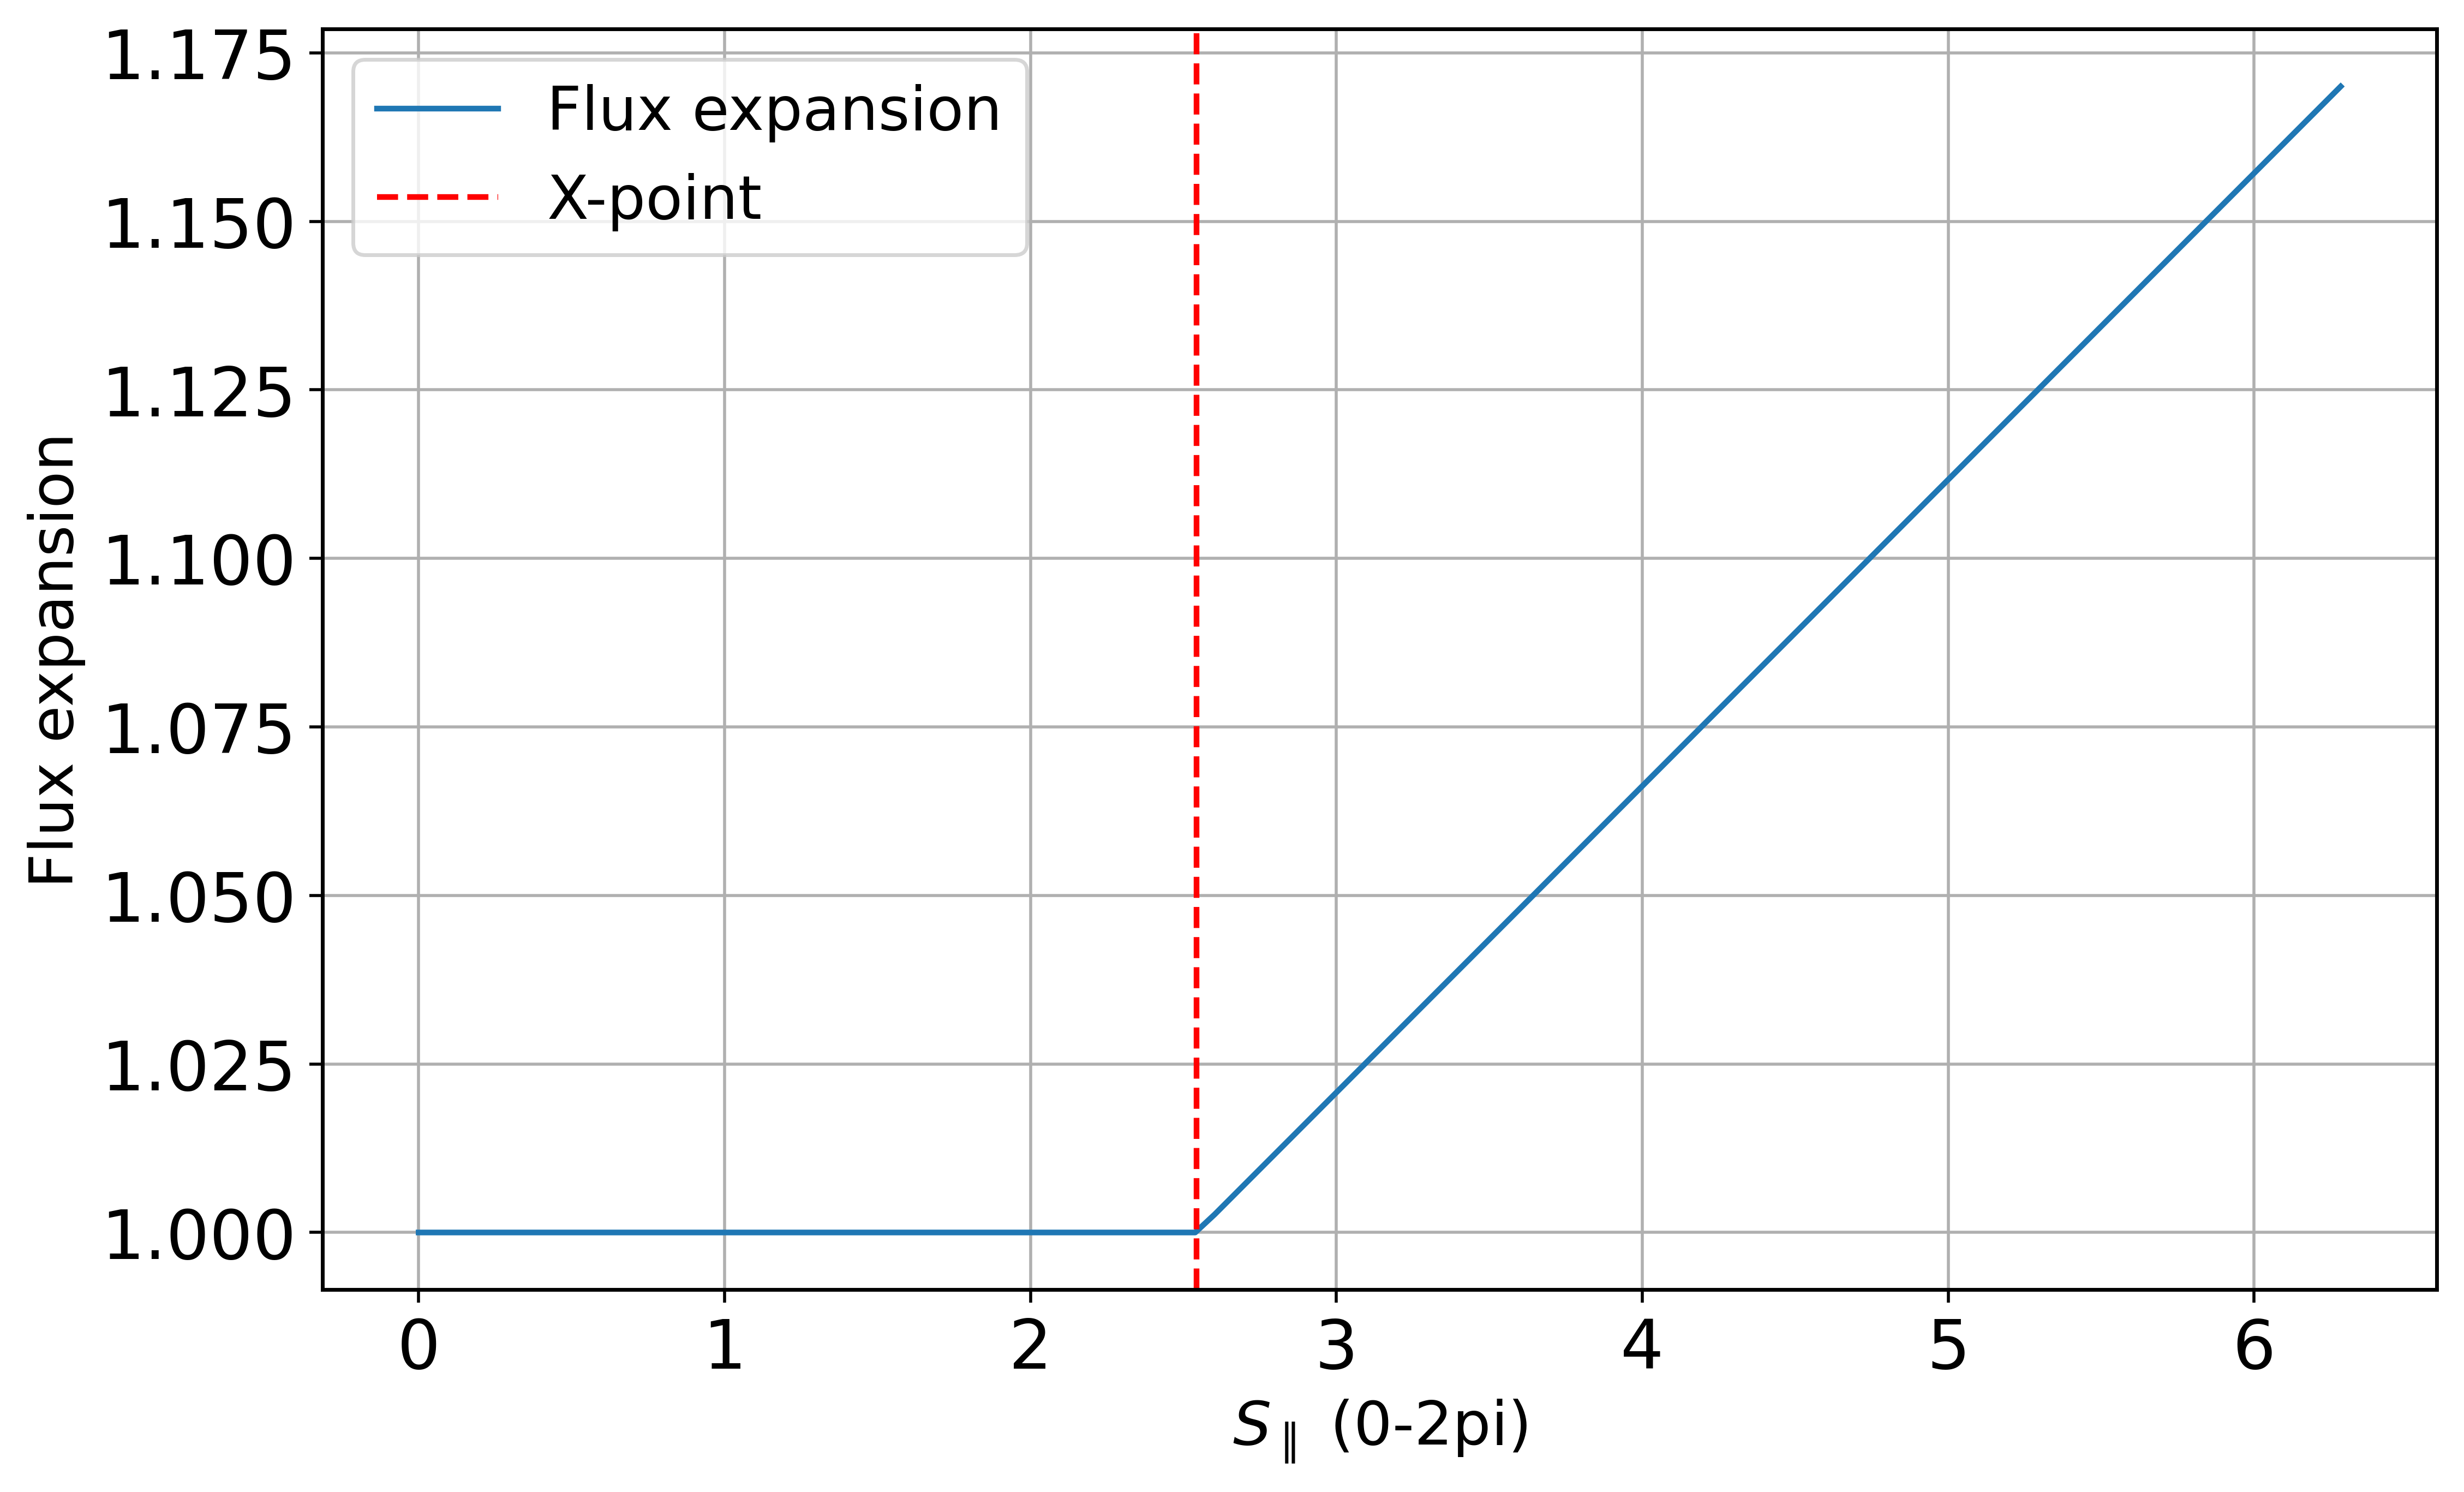

In [61]:
y = np.linspace(0,2*np.pi,100)

S_t = 84
S_xpt = 34

S_xpt_pi = ((np.pi*2)/84)*34

f_e = flux_expansion(y, S_xpt_pi)

fig,ax = plt.subplots(1,1, figsize = (10,6),dpi = 500)

plt.plot(y, f_e, label='Flux expansion')
plt.axvline(S_xpt_pi, color='r', linestyle='--', label='X-point')
plt.ylabel('Flux expansion')
plt.xlabel(r'$S_{\parallel}$ (0-2pi)')
plt.legend()


In [2]:
fl_sxd = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-10_glimmer_transients/type_1_ELM/FL/SXD/base_case_01_start_from_SNB')
snb_sxd = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-10_glimmer_transients/type_1_ELM/SNB/SXD/base_case')


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


In [6]:
print(fl_sxd)

for var_name, data_array in fl_sxd.data_vars.items():
    print(f"Variable: {var_name}")
    print(f"Dimensions: {data_array.dims}")
    print(f"Coordinates: {list(data_array.coords)}")
    print(f"Attributes: {data_array.attrs}")
    print("\n")  # Add a new line for better readability


<xarray.Dataset>
Dimensions:                        (x: 1, y: 800, t: 127, z: 1)
Coordinates:
    dx                             (x, y) float64 dask.array<chunksize=(1, 20), meta=np.ndarray>
    dy                             (x, y) float64 dask.array<chunksize=(1, 20), meta=np.ndarray>
    dz                             (x, y) float64 dask.array<chunksize=(1, 20), meta=np.ndarray>
  * t                              (t) float64 9.035e+06 9.04e+06 ... 9.665e+06
  * x                              (x) int64 0
  * y                              (y) float64 0.09732 0.2918 ... 81.98 81.99
  * z                              (z) float64 3.142
Data variables: (12/87)
    Bxy                            (x, y) float64 dask.array<chunksize=(1, 20), meta=np.ndarray>
    Ed+_iz                         (t, x, y, z) float64 dask.array<chunksize=(127, 1, 20, 1), meta=np.ndarray>
    Ed+_rec                        (t, x, y, z) float64 dask.array<chunksize=(127, 1, 20, 1), meta=np.ndarray>
    Ed+_sheath

array([<Axes: xlabel='S$_\\parallel$ (m)', ylabel='Te (eV)'>],
      dtype=object)

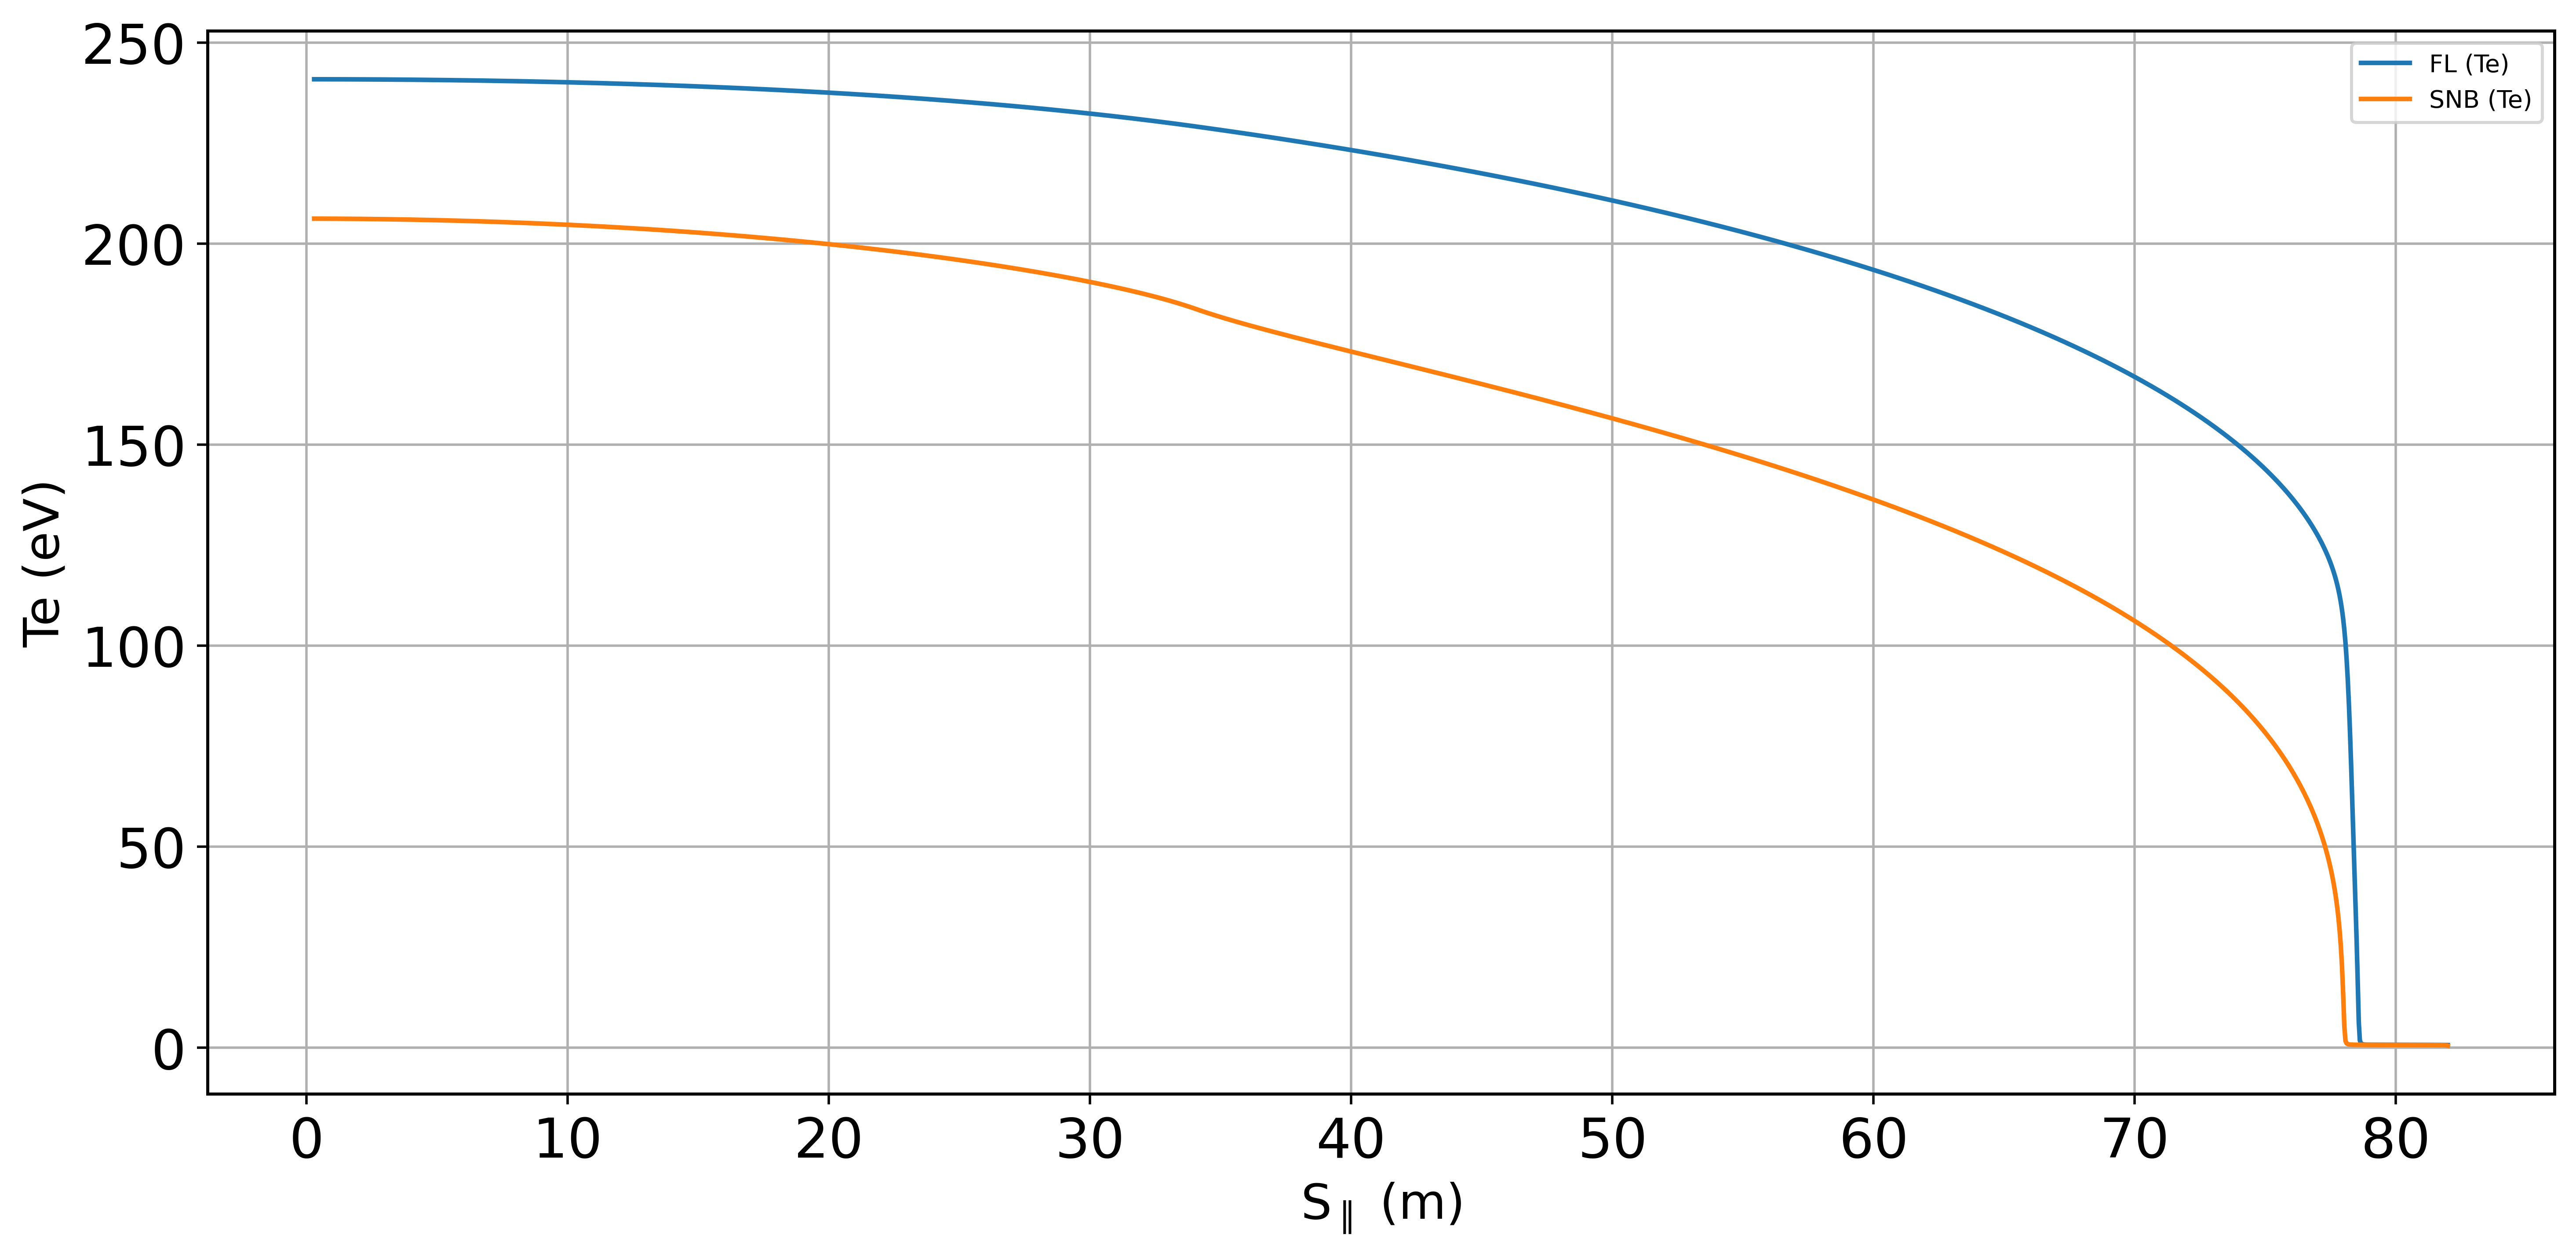

In [3]:
data_set = {'FL': fl_sxd, 'SNB': snb_sxd}

compare_profiles(data_set, variables=['Te'])

# Time dependant

In [8]:
fl_sxd_td = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-10_glimmer_transients/type_1_ELM/FL/SXD/test/case_02')

/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


In [ ]:
print(fl_sxd_td)

In [17]:
plot_profiles_animation(fl_sxd_td, variables = ['Te','Ne','Sd+_iz','Sd+_rec', 'Sd+_feedback'])



/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/my_notebooks/notebooks/hermes-3/general_functions/convergence_functions.py:266: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_yscale(scale)


Animation saved as profiles_animation.gif


TypeError: plot_profiles_animation() got an unexpected keyword argument 'time_range'

In [24]:
def plot_time_history(dataset, variables=['Te'], upstream_index=2, target_index=-2, 
                      track_detachment_front=False, time_slices=(-200, None), plot_target=True):
    """
    Plots the time history of user-specified variables at upstream and optionally target positions
    on separate plots, using a specified range of time slices.
    
    Optionally tracks the detachment front, where Nd > Ne, and adds it as a separate subplot.

    Parameters:
    dataset (xarray Dataset): Hermes-3 dataset.
    variables (list): List of variables to plot (e.g., ['Te', 'Td+', 'Ne']).
    upstream_index (int): Index for the upstream data.
    target_index (int): Index for the target data.
    track_detachment_front (bool): If True, track the location where Nd > Ne
                                   and show it as a separate subplot.
    plot_target (bool): If True, plots the target data; otherwise only plots upstream.
    time_slices (tuple): A tuple specifying the range of time slices to plot (start_slice, end_slice).
                         Defaults to the last 200 slices if not provided.
    """
    # Unpack the start and end of the time slice range
    start_slice, end_slice = time_slices

    # Select the range of time slices based on provided indices
    selected_steps = dataset.isel(t=slice(start_slice, end_slice))
    times = selected_steps['t'].values  # Corresponding time values
    t_conversion = dataset['t'].attrs['conversion']
    times = times * t_conversion*1e-3 # Convert to ms

    # Adjust the number of subplots based on whether we're tracking detachment front or plotting target
    total_vars = len(variables) + (1 if track_detachment_front else 0)
    rows = 1 if not plot_target else 2  # Only create 1 row of subplots if not plotting target

    # Create figure with subplots, one set for upstream and optionally one for target, plus detachment front if enabled
    fig, axs = plt.subplots(rows, total_vars, figsize=(12, 6), dpi=500)

    # Ensure axs is treated as a list if there's only one plot
    if total_vars == 1:
        axs = [axs] if rows == 1 else [axs[0], axs[1]]

    axs = np.ravel(axs)  # Flatten the axes for easy handling

    # Variable to store positions where Nd > Ne (detachment front)
    detachment_front_positions = [] if track_detachment_front else None

    # If tracking the detachment front, calculate it for each time slice
    if track_detachment_front:
        front_positions = []
        
        for t_step in range(len(times)):  # Use the filtered length of times
            ds_at_t = selected_steps.isel(t=t_step)
            front_loc = detachment_front_finder(ds_at_t, last_time_slice=False)
            front_positions.append(front_loc)

        detachment_front_positions = np.array(front_positions)

    # Iterate over each variable to plot upstream and optionally target values
    for i, var in enumerate(variables):
        y_values = selected_steps['y'].values

        # Extract upstream data for each variable
        upstream_data = np.squeeze(selected_steps[var].isel(y=upstream_index).values)

        # Plot upstream data on the top row (always plotted)
        axs[i].plot(times, upstream_data, label=f'Upstream {var}', marker='o', linestyle='-')
        axs[i].set_title(f'Upstream {var}')
        axs[i].set_xlabel('Time (ms)')
        axs[i].set_ylabel(f'{var} ({dataset[var].attrs.get("units", "Unknown units")})')
        axs[i].grid(True)

        # If plotting the target, extract and plot the target data
        if plot_target:
            target_data = np.squeeze(selected_steps[var].isel(y=target_index).values)
            axs[i + total_vars].plot(times, target_data, label=f'Target {var}', marker='x', linestyle='--')
            axs[i + total_vars].set_title(f'Target {var}')
            axs[i + total_vars].set_xlabel('Time (ms)')
            axs[i + total_vars].set_ylabel(f'{var} ({dataset[var].attrs.get("units", "Unknown units")})')
            axs[i + total_vars].grid(True)

    # Add a separate subplot for the detachment front position if requested
    if track_detachment_front:
        detachment_front_index = len(variables)  # The next index after all variables
        axs[detachment_front_index].plot(times, detachment_front_positions, marker='s', linestyle='-', color='red', 
                                         label='Nd > Ne Front')
        axs[detachment_front_index].set_title('Detachment Front Position (Nd > Ne)')
        axs[detachment_front_index].set_xlabel('Time (ms)')
        axs[detachment_front_index].set_ylabel('Position (m)')
        axs[detachment_front_index].grid(True)

        # Plot the same on the bottom row if the target is also plotted
        if plot_target:
            axs[detachment_front_index + total_vars].plot(times, detachment_front_positions, marker='s', linestyle='-', color='red', 
                                                          label='Nd > Ne Front')
            axs[detachment_front_index + total_vars].set_title('Detachment Front Position (Nd > Ne)')
            axs[detachment_front_index + total_vars].set_xlabel('Time (ms)')
            axs[detachment_front_index + total_vars].set_ylabel('Position (m)')
            axs[detachment_front_index + total_vars].grid(True)
    
    plt.tight_layout()
    plt.show()


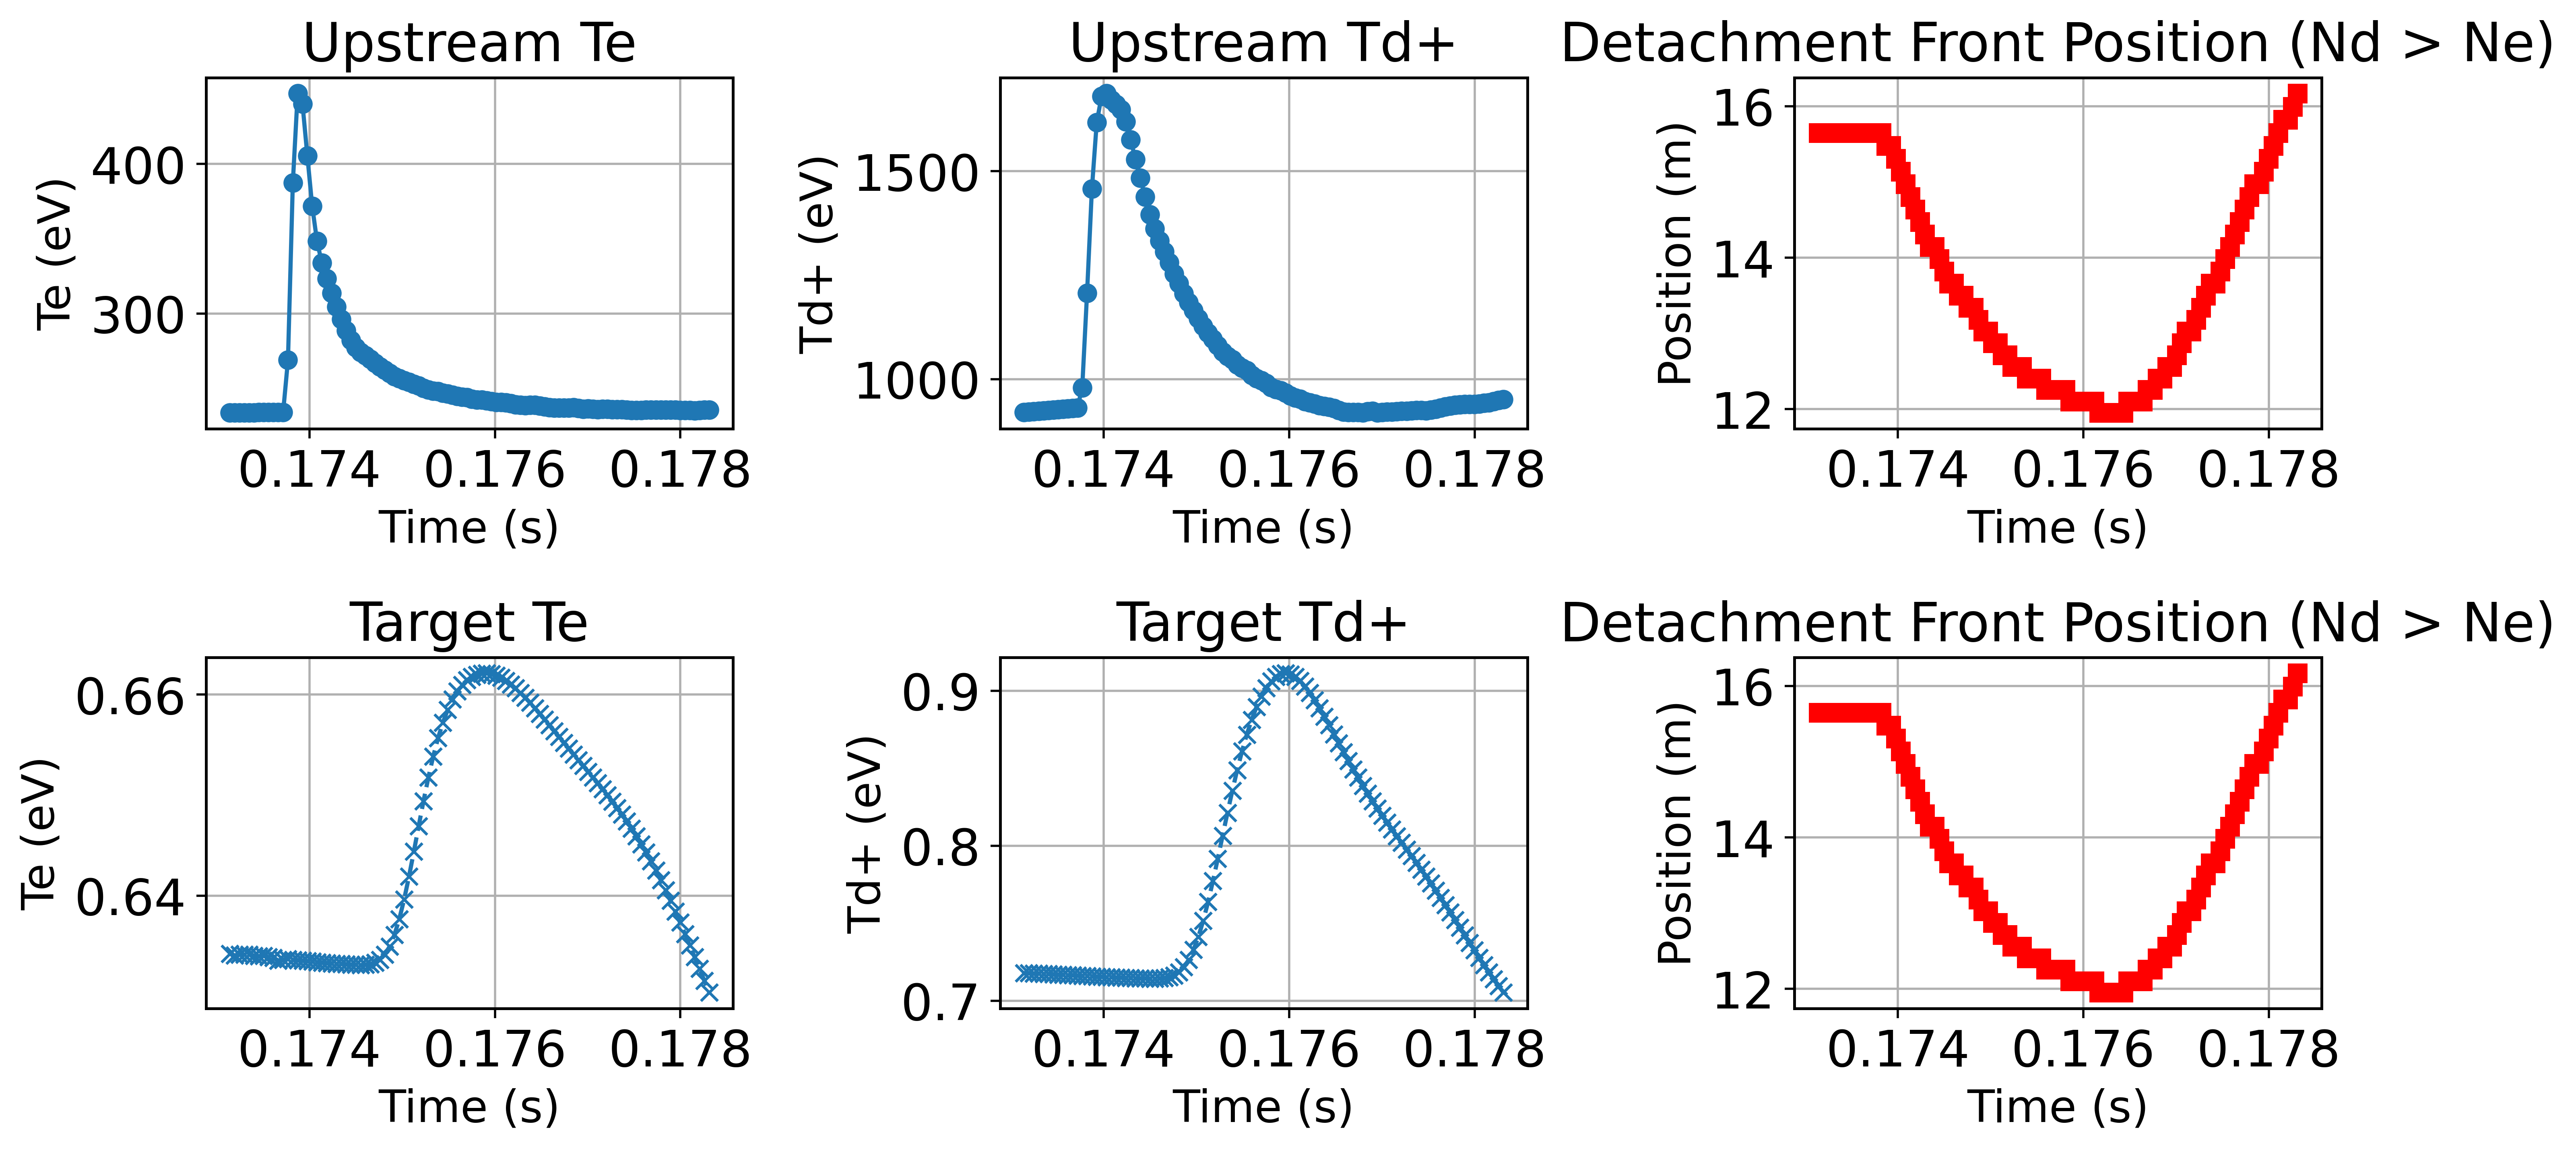

In [50]:
plot_time_history(fl_sxd_td, variables=[,'Td+'], track_detachment_front=True, plot_target=True, time_slices= (0, 100))

In [51]:
import matplotlib.animation as animation
from matplotlib.ticker import LogFormatter


def log_formatter():
    """
    Creates and returns a LogFormatter for use in plotting log-scaled data.
    
    This formatter will format the y-axis ticks to show non-scientific notation
    when the values are powers of 10, and scientific notation for others.

    Returns:
    LogFormatter: The formatter for logarithmic scale.
    """
    return LogFormatter(base=10.0, labelOnlyBase=False)


def plot_profiles_animation(simulation_data, variables=['Te'], data_label=None,
                            guard_replace=True, linestyles=None, log_threshold=1e6, filename='profiles_animation.gif',
                            time_slices=(-40, None)):
    """
    Creates an animated GIF of the specified variable profiles for a user-specified range of time slices,
    with time plotted in milliseconds.

    Parameters:
    simulation_data (xarray Dataset): Dataset for the simulation.
    variables (list): List of variables to plot (e.g., ['Te', 'Ti']).
    data_label (str, optional): Label for the dataset in the plot legend.
    guard_replace (bool): Whether to replace guard cells.
    linestyles (list, optional): Custom linestyles for each variable plot.
    log_threshold (float): Threshold above which the y-axis will be plotted in log scale.
    filename (str): The filename to save the animation as a GIF.
    time_slices (tuple): A tuple specifying the range of time slices to use for the animation (start_slice, end_slice).
                         Defaults to the last 40 time slices.
    """
    # Unpack the start and end of the time slice range
    start_slice, end_slice = time_slices

    # Select the time slices from the dataset
    selected_steps = simulation_data.isel(t=slice(start_slice, end_slice))
    num_timesteps = selected_steps.sizes['t']  # Calculate the number of timesteps in the range
    num_vars = len(variables)

    # Get time values in seconds and convert to milliseconds
    times = selected_steps['t'].values  # Corresponding time values
    t_conversion = simulation_data['t'].attrs.get('conversion', 1.0)
    times = times * t_conversion * 1e3  # Convert to milliseconds

    # Set up plot layout with two columns, adjusting rows based on the number of variables
    ncols = 2 if num_vars > 1 else 1
    nrows = (num_vars + 1) // 2  # Ensure enough rows

    fig, axs = plt.subplots(nrows, ncols, figsize=(12, 6 * nrows), dpi=500)
    
    # If we have only one subplot, axs won't be a list, so we ensure it's treated as such
    if num_vars == 1:
        axs = [axs]

    # Flatten axs in case of multiple rows and columns, to handle indexing uniformly
    axs = np.ravel(axs)

    if linestyles is None:
        linestyles = ['-'] * num_vars  # Default linestyle if not provided

    def update_plot(t_index):
        """Updates the plot for the given time index."""
        current_data = selected_steps.isel(t=t_index)  # Select the time step within the range
        current_time_ms = times[t_index]  # Get the corresponding time in milliseconds

        for i, var in enumerate(variables):
            ax = axs[i]
            ax.clear()  # Clear the previous frame

            y = current_data['y'].values
            var_data = np.ravel(current_data[var].values)

            if guard_replace:
                y = y[1:-1]
                var_data = replace_guards(var_data)

            label = f'{data_label} ({var})'
            ax.plot(y, var_data, label=label, linestyle=linestyles[i])

            # Determine if log scale is needed based on threshold
            if np.max(np.abs(var_data)) > log_threshold:
                scale = "log"
            else:
                scale = "linear"

            # Set the appropriate scale
            ax.set_yscale(scale)
            if scale == "log":
                ax.yaxis.set_major_formatter(log_formatter())  # Apply log formatting

            # Get units
            units = current_data[var].attrs.get('units', 'Unknown units')

            ax.set_xlabel(r'S$_\parallel$ (m)')
            ax.set_ylabel(f'{var} ({units})')
            ax.legend(loc='best', fontsize=8)
            ax.grid(True)
            ax.set_title(f'Time: {current_time_ms:.2f} ms')

    # Create animation using FuncAnimation
    ani = animation.FuncAnimation(fig, update_plot, frames=num_timesteps, repeat=False)

    # Save the animation as a GIF using PillowWriter
    ani.save(filename, writer='pillow', fps=10)

    print(f"Animation saved as {filename}")
    plt.close()


In [52]:
plot_profiles_animation(fl_sxd_td, variables=['Te'], data_label='FL', time_slices=(0, 400), filename='profiles_animation.gif')

Animation saved as profiles_animation.gif


In [45]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display
from matplotlib.ticker import LogFormatter


def log_formatter():
    """
    Creates and returns a LogFormatter for use in plotting log-scaled data.
    
    This formatter will format the y-axis ticks to show non-scientific notation
    when the values are powers of 10, and scientific notation for others.

    Returns:
    LogFormatter: The formatter for logarithmic scale.
    """
    return LogFormatter(base=10.0, labelOnlyBase=False)


def interactive_profiles_plot(simulation_data, variables=['Te'], data_label=None,
                              guard_replace=True, linestyles=None, log_threshold=1e6,
                              time_slices=(-40, None)):
    """
    Creates an interactive plot of the specified variable profiles for a user-specified range of time slices,
    with time plotted in milliseconds.

    Parameters:
    simulation_data (xarray Dataset): Dataset for the simulation.
    variables (list): List of variables to plot (e.g., ['Te', 'Ti']).
    data_label (str, optional): Label for the dataset in the plot legend.
    guard_replace (bool): Whether to replace guard cells.
    linestyles (list, optional): Custom linestyles for each variable plot.
    log_threshold (float): Threshold above which the y-axis will be plotted in log scale.
    time_slices (tuple): A tuple specifying the range of time slices to use for the animation (start_slice, end_slice).
                         Defaults to the last 40 time slices.
    """
    # Unpack the start and end of the time slice range
    start_slice, end_slice = time_slices

    # Select the time slices from the dataset
    selected_steps = simulation_data.isel(t=slice(start_slice, end_slice))
    num_timesteps = selected_steps.sizes['t']  # Calculate the number of timesteps in the range
    num_vars = len(variables)

    # Get time values in seconds and convert to milliseconds
    times = selected_steps['t'].values  # Corresponding time values
    t_conversion = simulation_data['t'].attrs.get('conversion', 1.0)
    times = times * t_conversion * 1e3  # Convert to milliseconds

    # Set up plot layout with two columns, adjusting rows based on the number of variables
    ncols = 2 if num_vars > 1 else 1
    nrows = (num_vars + 1) // 2  # Ensure enough rows

    fig, axs = plt.subplots(nrows, ncols, figsize=(12, 6 * nrows), dpi=500)
    
    # If we have only one subplot, axs won't be a list, so we ensure it's treated as such
    if num_vars == 1:
        axs = [axs]

    # Flatten axs in case of multiple rows and columns, to handle indexing uniformly
    axs = np.ravel(axs)

    if linestyles is None:
        linestyles = ['-'] * num_vars  # Default linestyle if not provided

    # Function to update plot based on the selected time index
    def update_plot(t_index):
        current_data = selected_steps.isel(t=t_index)  # Select the time step within the range
        current_time_ms = times[t_index]  # Get the corresponding time in milliseconds

        for i, var in enumerate(variables):
            ax = axs[i]
            ax.clear()  # Clear the previous frame

            y = current_data['y'].values
            var_data = np.ravel(current_data[var].values)

            if guard_replace:
                y = y[1:-1]
                var_data = replace_guards(var_data)

            label = f'{data_label} ({var})'
            ax.plot(y, var_data, label=label, linestyle=linestyles[i])

            # Determine if log scale is needed based on threshold
            if np.max(np.abs(var_data)) > log_threshold:
                scale = "log"
            else:
                scale = "linear"

            # Set the appropriate scale
            ax.set_yscale(scale)
            if scale == "log":
                ax.yaxis.set_major_formatter(log_formatter())  # Apply log formatting

            # Get units
            units = current_data[var].attrs.get('units', 'Unknown units')

            ax.set_xlabel(r'S$_\parallel$ (m)')
            ax.set_ylabel(f'{var} ({units})')
            ax.legend(loc='best', fontsize=8)
            ax.grid(True)
            ax.set_title(f'Time: {current_time_ms:.2f} ms')

    # Create an interactive slider
    slider = widgets.IntSlider(min=0, max=num_timesteps - 1, step=1, description="Time step")

    # Use the slider to update the plot
    widgets.interact(update_plot, t_index=slider)

    # Display the interactive plot and slider
    display(slider)

    # Initial plot
    update_plot(0)


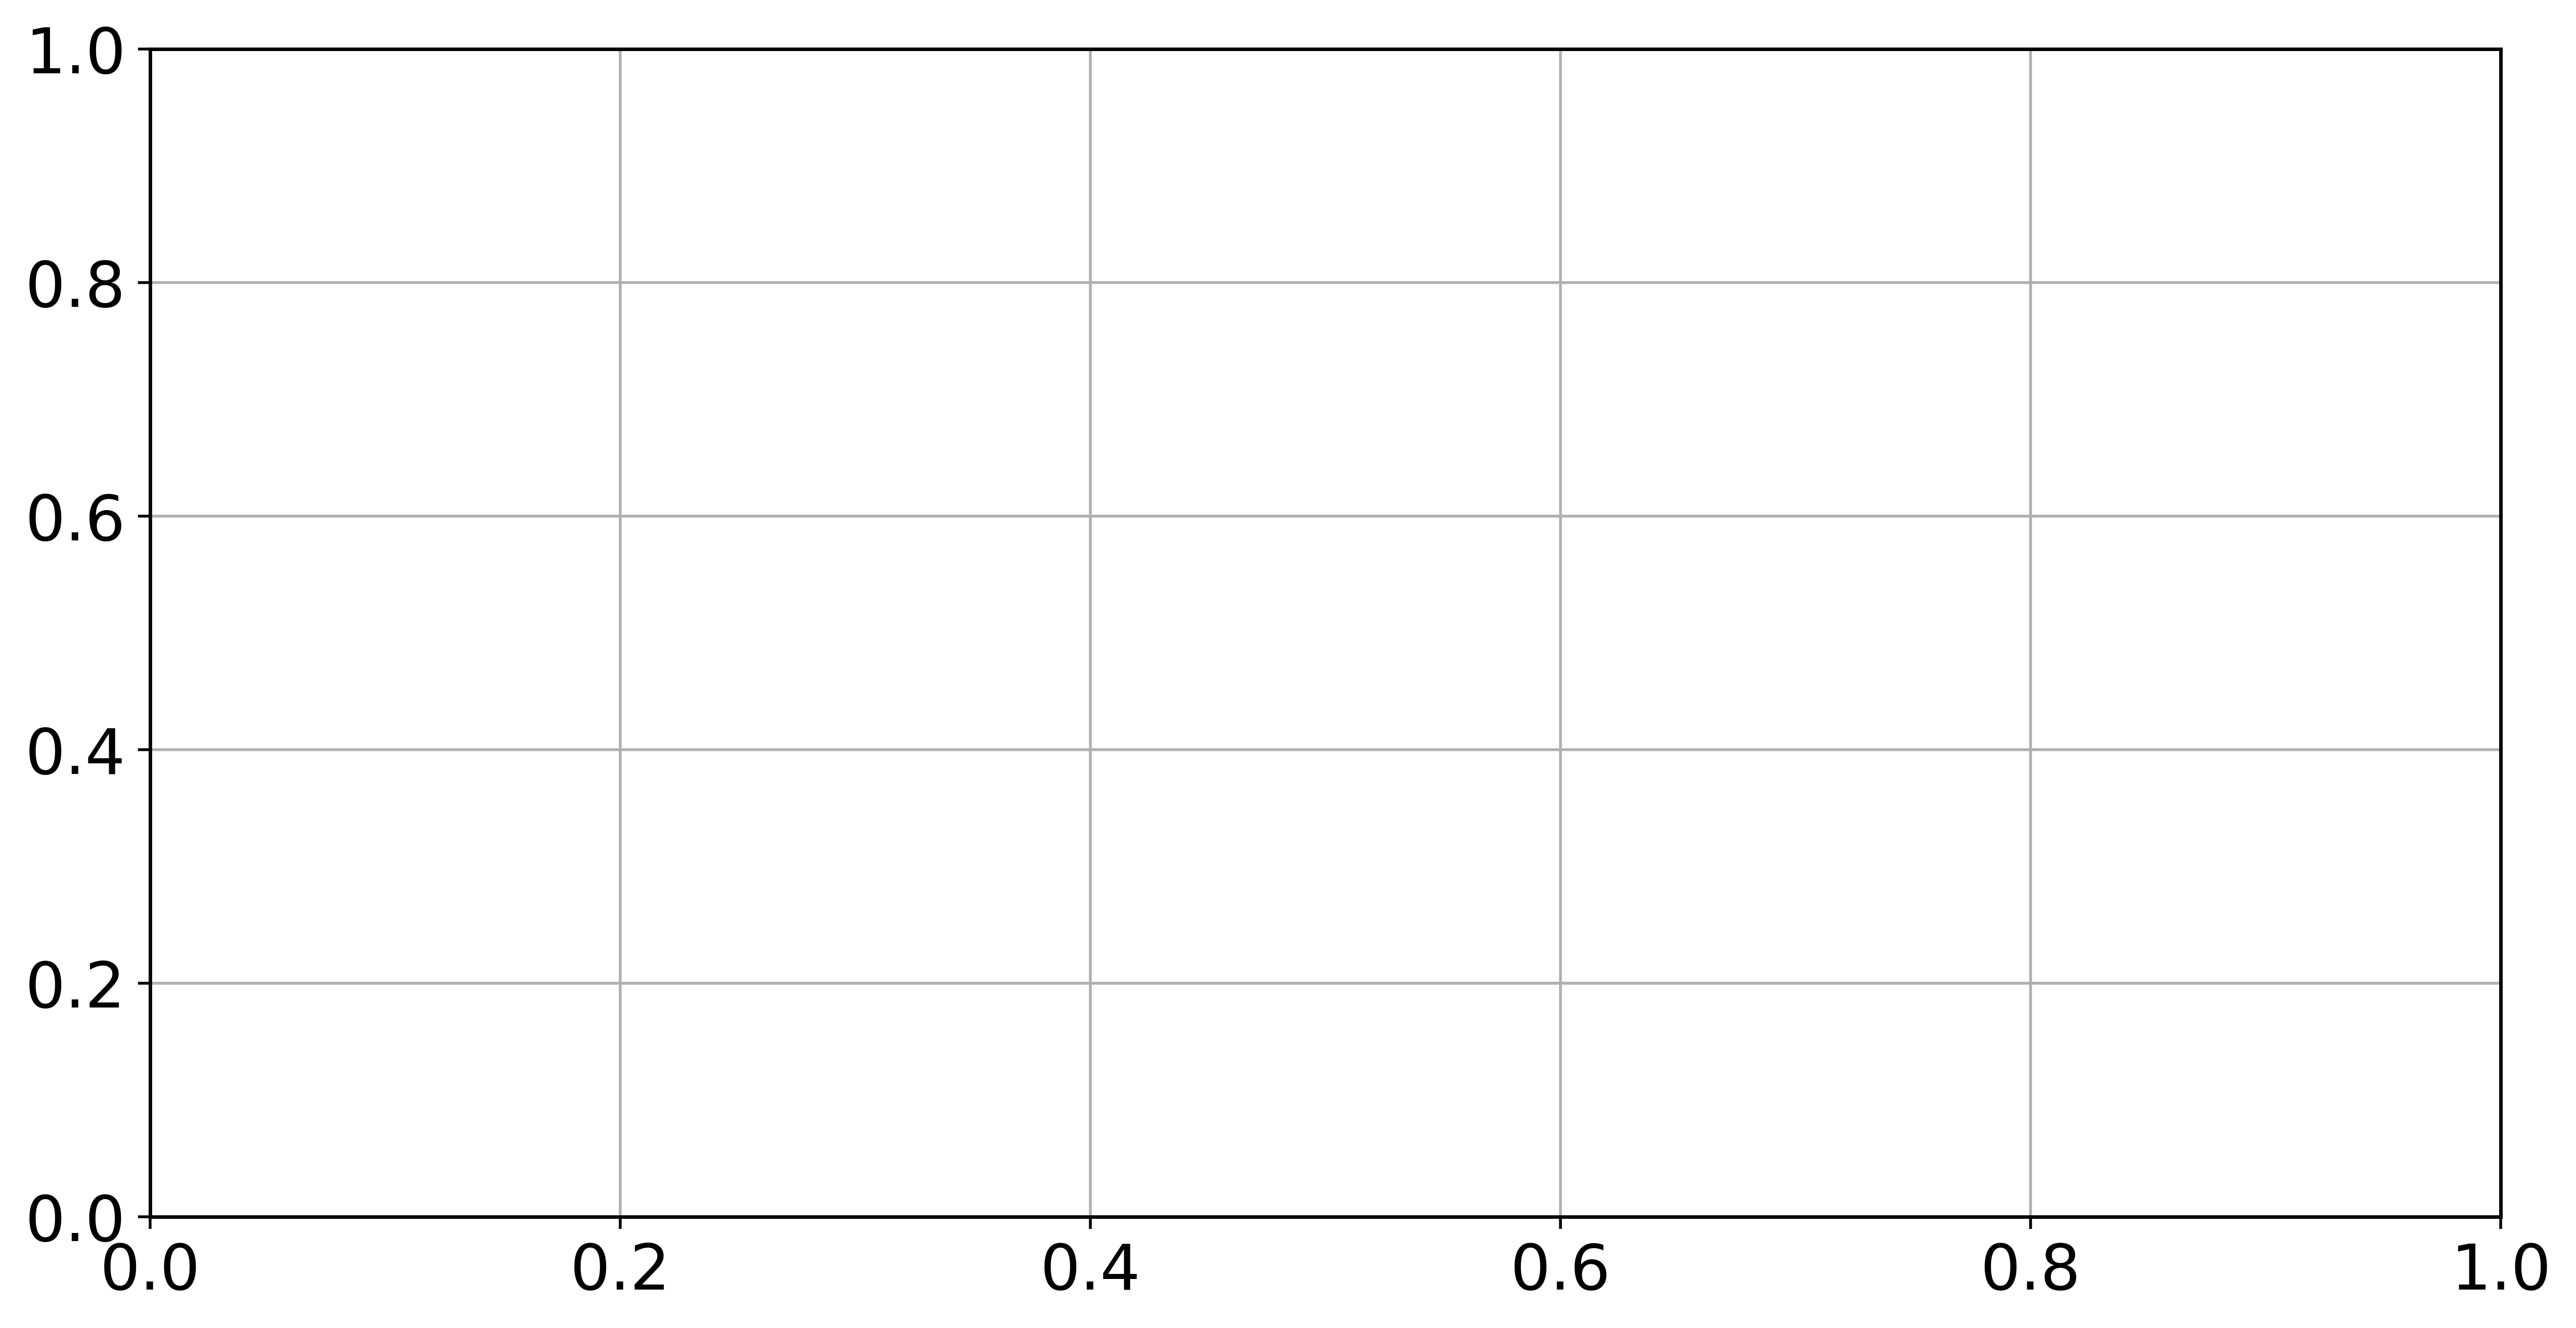

interactive(children=(IntSlider(value=0, description='Time step', max=399), Output()), _dom_classes=('widget-i…

IntSlider(value=0, description='Time step', max=399)

In [47]:
interactive_profiles_plot(fl_sxd_td, variables=['Te'], data_label='FL', time_slices=(0, 400))

In [63]:
from moviepy.editor import VideoFileClip

def convert_gif_to_mp4(gif_path, mp4_path):
    """
    Converts a GIF file to an MP4 file.

    Parameters:
    gif_path (str): Path to the input GIF file.
    mp4_path (str): Path to save the output MP4 file.
    """
    # Load the GIF
    clip = VideoFileClip(gif_path)
    
    # Write to MP4 format
    clip.write_videofile(mp4_path, codec="libx264")

# Example usage
convert_gif_to_mp4("/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/my_notebooks/notebooks/hermes-3/transients/1_D/presentation/profiles_animation.gif", "output.mp4")


[autoreload of decorator failed: Traceback (most recent call last):
  File "/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 500, in superreload
    update_generic(old_obj, new_obj)
  File "/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 397, in update_generic
    update(a, b)
  File "/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 309, in update_function
    setattr(old, name, getattr(new, name))
ValueError: ContextManager() requires a code object with 3 free vars, not 0
]


The history saving thread hit an unexpected error (NameError("name 'fix' is not defined")).History will not be written to the database.
Moviepy - Building video output.mp4.
Moviepy - Writing video output.mp4



Moviepy - Done !
Moviepy - video ready output.mp4
